In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the data
df = pd.read_csv('Salary_Data_Based_Country_And_Race.csv')
df.head()

,Unnamed: 0,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


Data Preprocessing

In [4]:
# checking the shape of the data
df.shape

(6704, 9)

In [5]:
# checking for null/missing values
df.isnull().sum()

Unnamed: 0             0
Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
Country                0
Race                   0
dtype: int64

In [6]:
# the number of rows with null/missing value is very less as compared to the total number of rows
df.dropna(axis=0, inplace=True)

In [7]:
# checking for null values
df.isnull().sum()

Unnamed: 0             0
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
dtype: int64

In [8]:
# dropping column
df.drop(columns = 'Unnamed: 0',axis=1,inplace=True)

In [9]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
Country                 object
Race                    object
dtype: object

In [10]:
# unique values in each column
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
Country                  5
Race                    10
dtype: int64

In [11]:
# job title column has 191 different values. It will be very difficult to analyze so many job titles. So, grouping the job titles
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [12]:
def categorize_job_title(job_title):
    job_title = str(job_title).lower() 
    if 'software' in job_title or 'developer' in job_title:
        return 'Software/Developer'
    elif 'data' in job_title or 'analyst' in job_title or 'scientist' in job_title:
        return 'Data Analyst/Scientist'
    elif 'manager' in job_title or 'director' in job_title or 'vp' in job_title:
        return 'Manager/Director/VP'
    elif 'sales' in job_title or 'representative' in job_title:
        return 'Sales'
    elif 'marketing' in job_title or 'social media' in job_title:
        return 'Marketing/Social Media'
    elif 'product' in job_title or 'designer' in job_title:
        return 'Product/Designer'
    elif 'hr' in job_title or 'human resources' in job_title:
        return 'HR/Human Resources'
    elif 'financial' in job_title or 'accountant' in job_title:
        return 'Financial/Accountant'
    elif 'project manager' in job_title:
        return 'Project Manager'
    elif 'it' in job_title or 'support' in job_title:
        return 'IT/Technical Support'
    elif 'operations' in job_title or 'supply chain' in job_title:
        return 'Operations/Supply Chain'
    elif 'customer service' in job_title or 'receptionist' in job_title:
        return 'Customer Service/Receptionist'
    else:
        return 'Other'

df['Job Title'] = df['Job Title'].apply(categorize_job_title)

In [13]:
# in the dataset the education level is represented in two different ways, Bachelor and Bachelor degree, which means same. So grouping it
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [14]:
def group_education(Educaton):
    Educaton = str(Educaton).lower()
    if 'high school' in Educaton:
        return 'High School'
    elif 'bachelor\'s' in Educaton:
        return 'Bachelors'
    elif 'master\'s' in Educaton:
        return 'Masters'
    elif 'phd' in Educaton:
        return 'PhD'

df['Education Level'] = df['Education Level'].apply(group_education)

In [15]:
# descriptive statistics
df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [16]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,32.0,Male,Bachelors,Software/Developer,5.0,90000.0,UK,White
1,28.0,Female,Masters,Data Analyst/Scientist,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Manager/Director/VP,15.0,150000.0,Canada,White
3,36.0,Female,Bachelors,Sales,7.0,60000.0,USA,Hispanic
4,52.0,Male,Masters,Manager/Director/VP,20.0,200000.0,USA,Asian


EDA

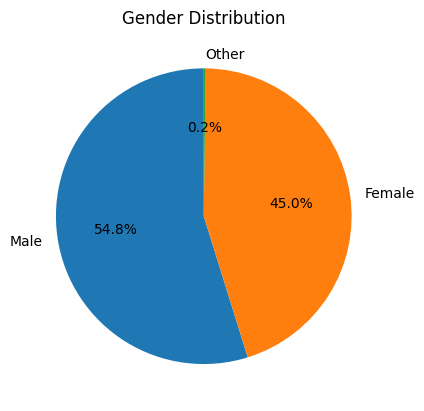

In [17]:
# pie chart
plt.pie(df['Gender'].value_counts(), labels=['Male','Female', 'Other'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

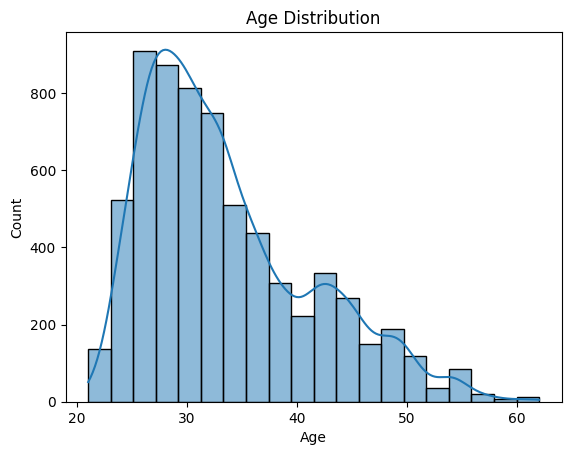

In [18]:
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

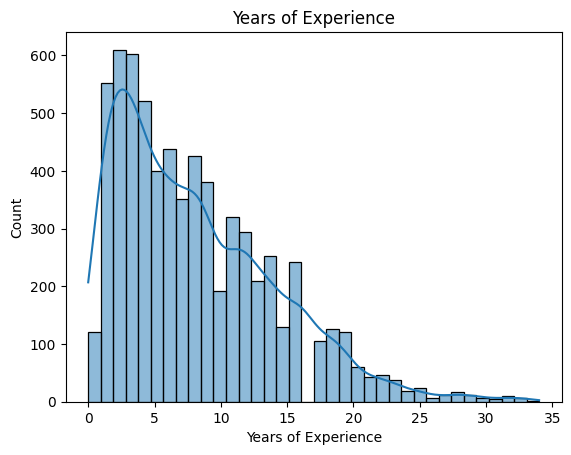

In [19]:
sns.histplot(x = 'Years of Experience', data = df,kde=True)
plt.title('Years of Experience')
plt.show()

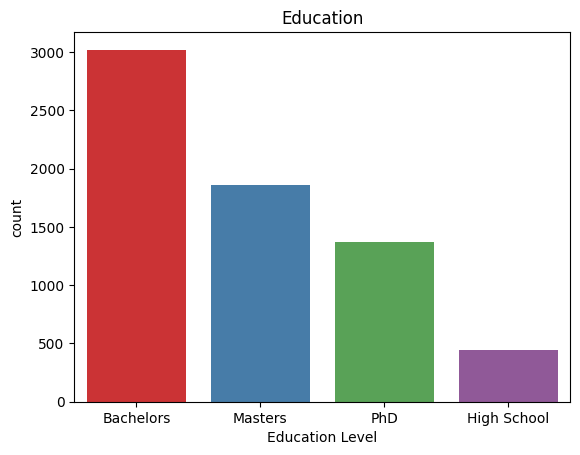

In [20]:
sns.countplot(x='Education Level', data=df, hue='Education Level', palette='Set1', legend=False)
plt.xticks()
plt.title('Education')
plt.show()

Text(0.5, 1.0, 'Job')

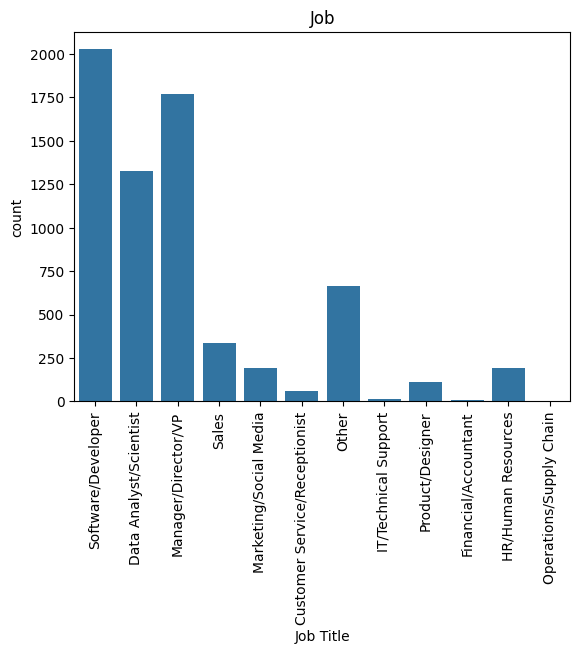

In [21]:
sns.countplot(x='Job Title', data = df)
plt.xticks(rotation=90)
plt.title('Job')

Text(0.5, 1.0, 'Age vs Salary')

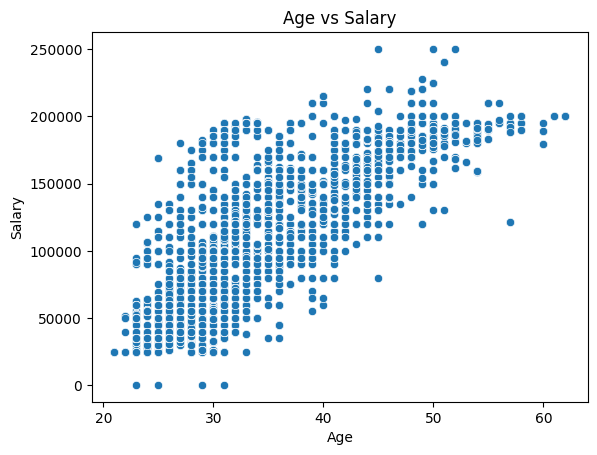

In [22]:
sns.scatterplot(x = 'Age', y='Salary', data=df)
plt.title('Age vs Salary')

Text(0.5, 1.0, 'Years of Experience vs Salary')

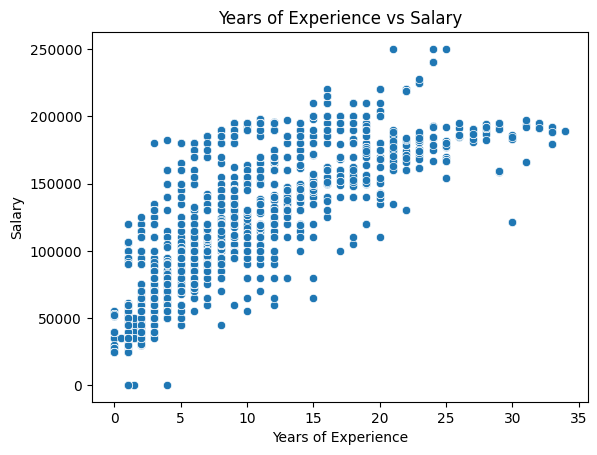

In [23]:
sns.scatterplot(x= 'Years of Experience', y  = 'Salary', data = df).set_title('Years of Experience vs Salary')

Text(0.5, 1.0, 'Gender vs Salary')

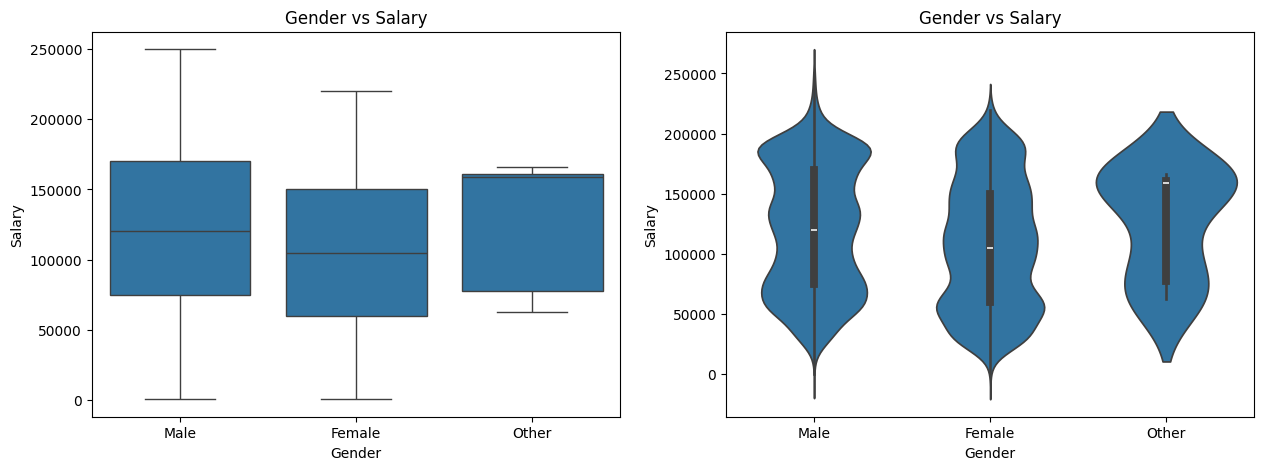

In [24]:
fig, ax = plt.subplots(1,2, figsize = (15, 5))
sns.boxplot(x = 'Gender', y='Salary', data = df, ax =ax[0]).set_title('Gender vs Salary')
sns.violinplot(x = 'Gender', y='Salary', data = df, ax =ax[1]).set_title('Gender vs Salary')

Text(0.5, 1.0, 'Education Level vs Salary')

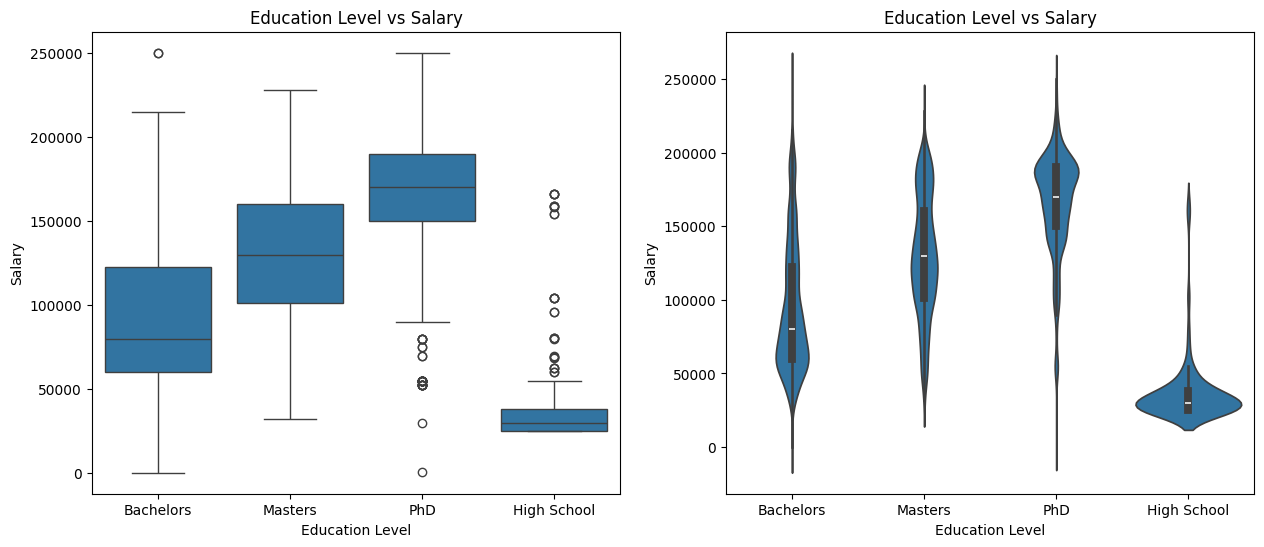

In [25]:
fig,ax = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[0]).set_title('Education Level vs Salary')
sns.violinplot(x = 'Education Level', y = 'Salary', data = df, ax=ax[1]).set_title('Education Level vs Salary')

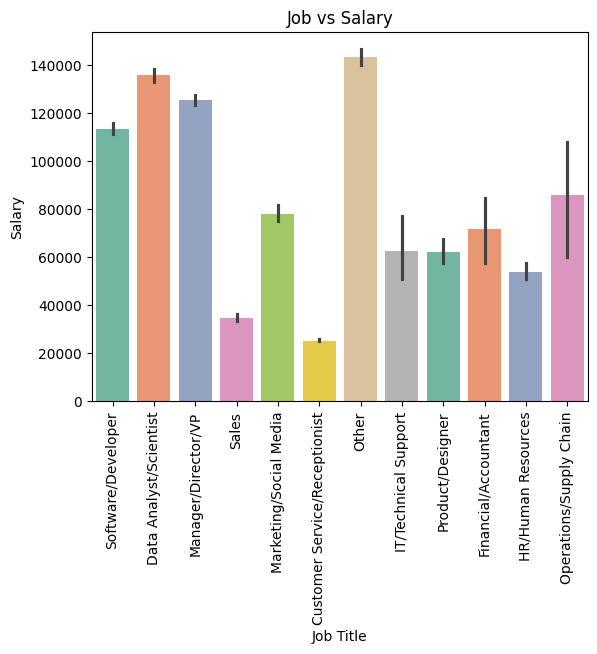

In [26]:
sns.barplot(x='Job Title', y='Salary', data=df, hue='Job Title', palette='Set2', legend=False)
plt.xticks(rotation=90)
plt.title('Job vs Salary')
plt.show()

Data Preprocessing Part-2

In [27]:
# Label encoding to categorical features. Convert categorical features into numerical labels.
from sklearn.preprocessing import LabelEncoder
features = ['Gender','Country','Education Level','Job Title', 'Race']
le = LabelEncoder()
for feature in features:
    le.fit(df[feature].unique())
    df[feature] = le.transform(df[feature])
    print(feature, df[feature].unique())

Gender [1 0 2]
Country [3 4 1 2 0]
Education Level [0 2 3 1]
Job Title [11  1  5 10  6  0  8  4  9  2  3  7]
Race [9 5 1 6 4 2 8 0 7 3]


In [28]:
# normalizing the continuous variables.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Years of Experience', 'Salary']] = scaler.fit_transform(df[['Age', 'Years of Experience', 'Salary']])

In [29]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race
0,-0.213129,1,0,11,-0.510769,-0.479849,3,9
1,-0.738393,0,2,1,-0.840811,-0.953461,4,5
2,1.493980,1,3,5,1.139440,0.656819,1,9
3,0.312135,0,0,10,-0.180727,-1.048183,4,5
4,2.413192,1,2,5,1.964544,1.604042,4,1


<Axes: >

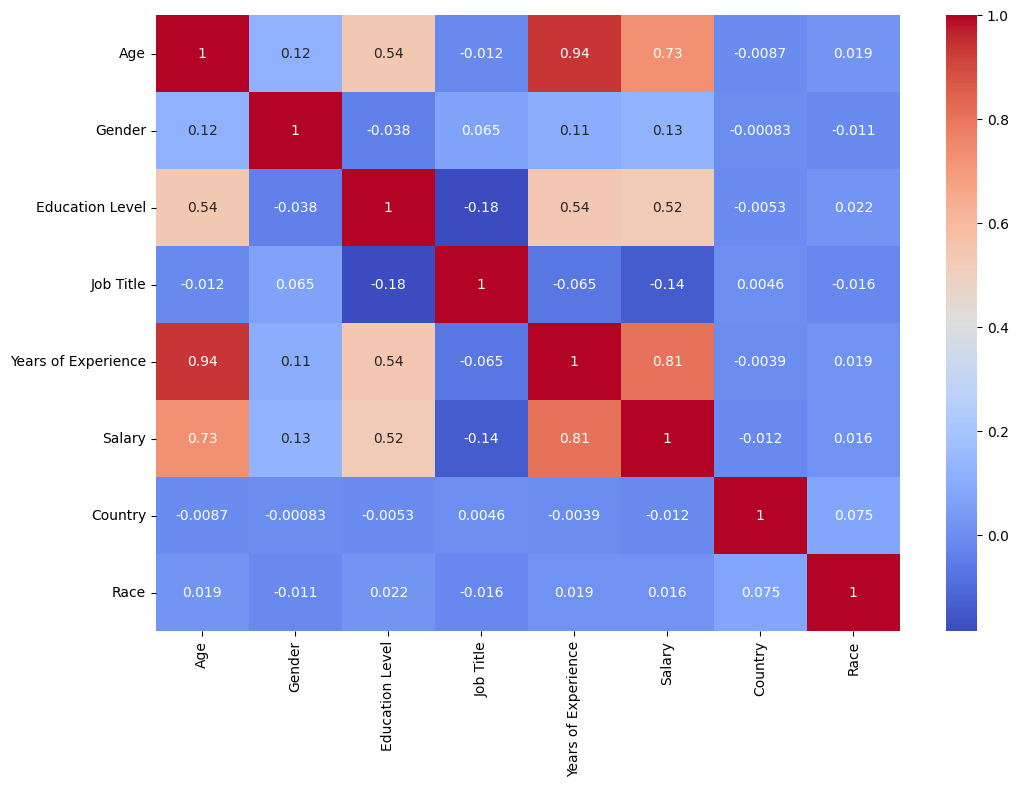

In [30]:
# coorelation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

In [31]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Salary'])
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor()
parameters = {
    'max_depth': [2,4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0,42]
}

grid_search = GridSearchCV(dtree, parameters, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, error_score='raise', verbose=3)
grid_search.fit(X_train, y_train)


# Print best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}


In [33]:
# Initialize Decision Tree Regressor with best parameters
dtree = DecisionTreeRegressor(**grid_search.best_params_)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, random_state=0)

In [34]:
# Evaluate training accuracy
train_score = dtree.score(X_train, y_train)
print(f"Training R-squared Score: {train_score}")

Training R-squared Score: 0.9026424070583517


In [35]:
# Predict on test data
y_pred = dtree.predict(X_test)

In [ ]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)
comparison_df.head(10)

,Actual,Predicted
0,0.656819,0.330758
1,-0.745659,-0.730151
2,-0.290405,-0.290405
3,-1.048183,-1.033611
4,-0.669294,-0.373575
5,1.414598,1.326190
6,-0.820850,-0.820850
7,-1.142906,-1.075247
8,1.509320,0.343670
9,0.277930,0.809597


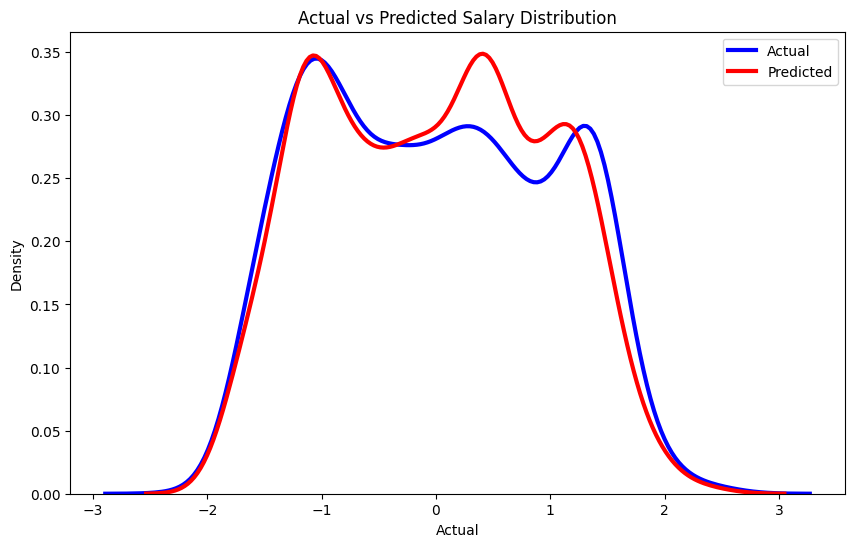

In [37]:
plt.figure(figsize=(10, 6))
sns.kdeplot(comparison_df['Actual'], color='blue', linewidth=3, label='Actual')
sns.kdeplot(comparison_df['Predicted'], color='red', linewidth=3, label='Predicted')
plt.title("Actual vs Predicted Salary Distribution")
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate and print evaluation metrics
print("R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.8830099115541592
Mean Squared Error: 0.11972398748602252
Mean Absolute Error: 0.22124965078028738
Root Mean Squared Error (RMSE): 0.346011542417334


Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()

In [40]:
# trainig the model
rfg.fit(X_train, y_train)

RandomForestRegressor()

In [41]:
# training accuracy
rfg.score(X_train, y_train)

0.9879495475162661

In [42]:
# predicitng salary of the employee
r_pred = rfg.predict(X_test)

In [43]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)

,Actual,Predicted
0,0.656819,0.642021
1,-0.745659,-0.708249
2,-0.290405,-0.290405
3,-1.048183,-1.051215
4,-0.669294,-0.647745
5,1.414598,1.502090
6,-0.820850,-0.806945
7,-1.142906,-1.114704
8,1.509320,1.533978
9,0.277930,0.316661


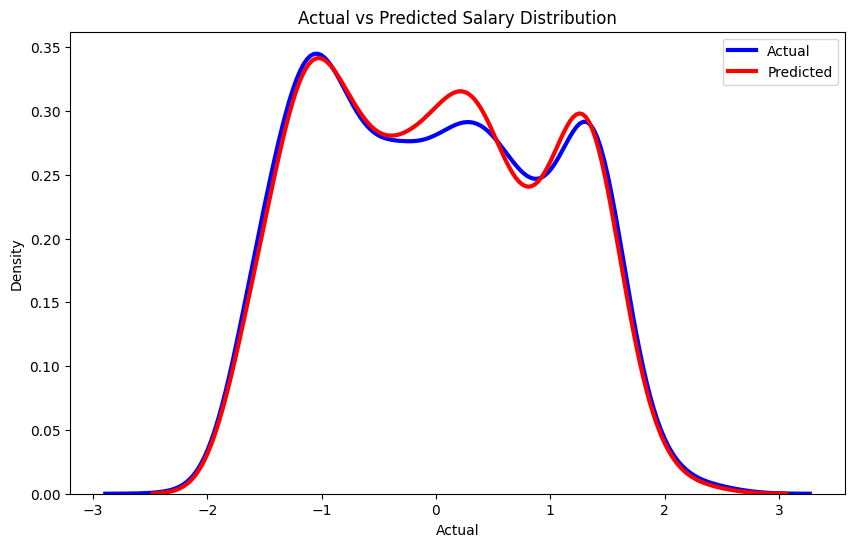

In [44]:
plt.figure(figsize=(10, 6))
ax = sns.kdeplot(dfr['Actual'], color='blue', linewidth=3, label='Actual')
sns.kdeplot(dfr['Predicted'], color='red', linewidth=3, label='Predicted', ax=ax)
plt.title("Actual vs Predicted Salary Distribution")
plt.legend()
plt.show()

In [45]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, r_pred)))

R2 Score:  0.9471739725377935
Mean Squared Error:  0.054060499781136334
Mean Absolute Error:  0.11432525172762042
RMSE: 0.23250913913465066


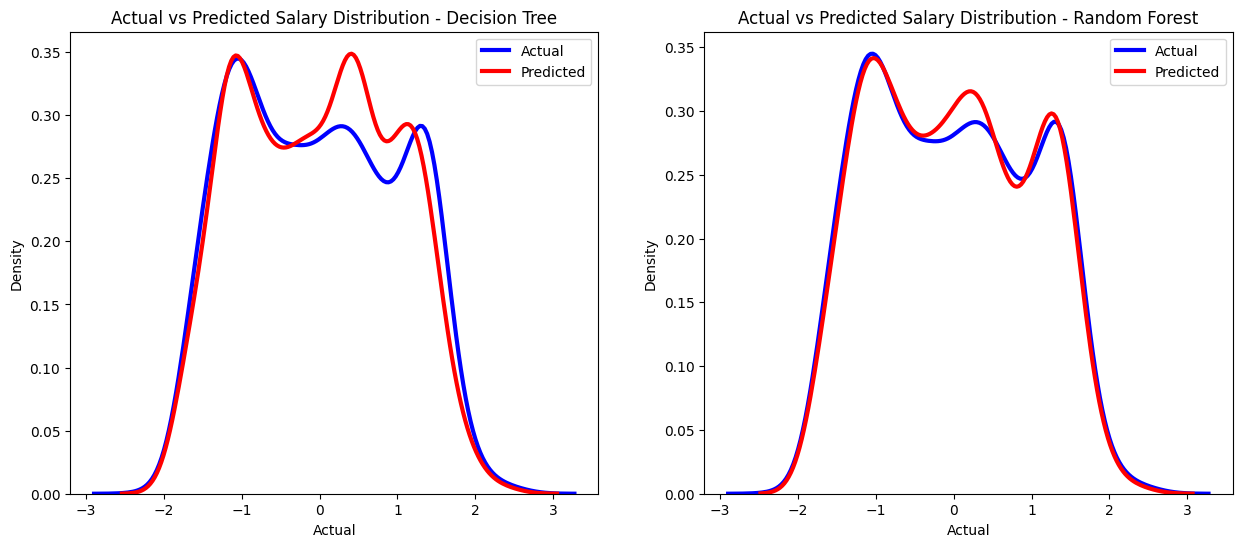

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
# Plot the first KDE (Actual vs Predicted for comparison_df)
sns.kdeplot(comparison_df['Actual'], color='blue', linewidth=3, label='Actual', ax=axes[0])
sns.kdeplot(comparison_df['Predicted'], color='red', linewidth=3, label='Predicted', ax=axes[0])
axes[0].set_title("Actual vs Predicted Salary Distribution - Decision Tree")
axes[0].legend()

# Plot the second KDE (Actual vs Predicted for dfr)
sns.kdeplot(dfr['Actual'], color='blue', linewidth=3, label='Actual', ax=axes[1])
sns.kdeplot(dfr['Predicted'], color='red', linewidth=3, label='Predicted', ax=axes[1])
axes[1].set_title("Actual vs Predicted Salary Distribution - Random Forest")
axes[1].legend()